In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
import seaborn as sns
sys.path.append('../creme/')
import creme
import utils
import shutil
import pickle
import glob
import pandas as pd
import numpy as np
import itertools, os
from tqdm import tqdm

5000it [00:00, 9533.82it/s] 


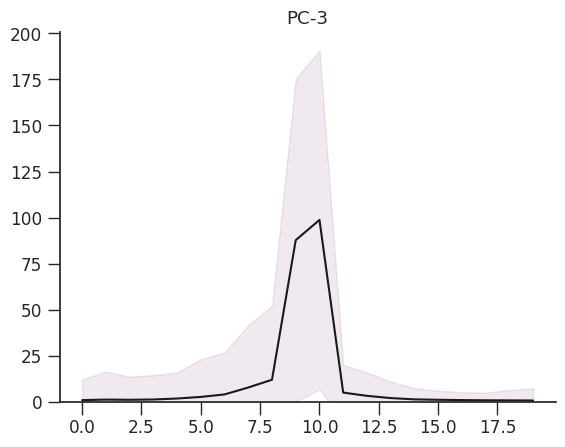

5000it [00:00, 11805.93it/s]


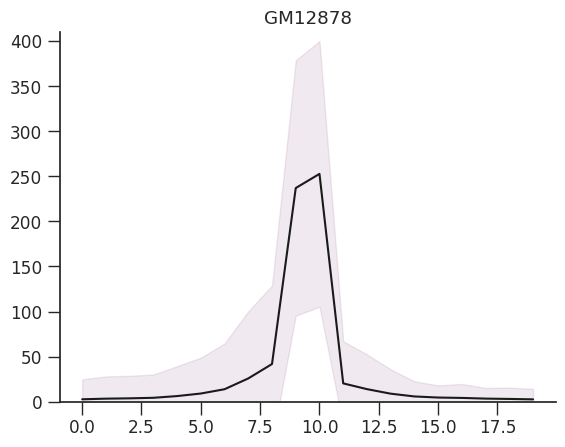

5000it [00:00, 11962.59it/s]


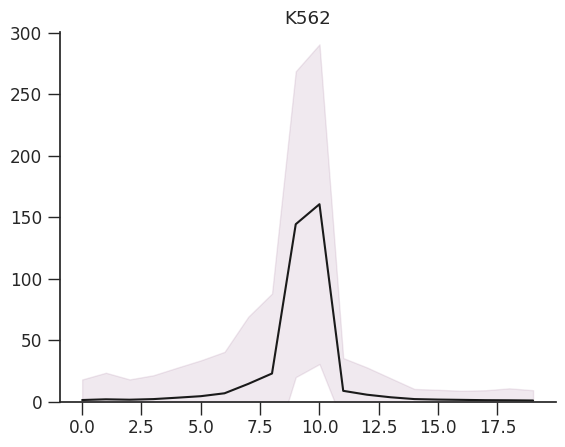

In [9]:
cell_lines = [4824, 5110, 5111]
cell_line_names = ['PC-3', 'GM12878', 'K562']
bin_index = [447, 448]
model_name = 'enformer'

sns.set(font_scale = 1.1)
sns.set_style(style='white')
plt.rcParams['xtick.major.size'] = 9
plt.rcParams['xtick.major.width'] = 1

plt.rcParams['ytick.major.size'] = 9
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
for i, c in enumerate(cell_lines):
    selected_tss_path = glob.glob(f'../results/gencode_tss_predictions/{model_name}/{c}_{cell_line_names[i]}*_selected_tss.csv')[0]
    cell_name = selected_tss_path.split('_')[-3]
    wts = []
    selected_tss = pd.read_csv(selected_tss_path)
    for _, row in tqdm(selected_tss.iterrows()):
        
        r = f'../results/context_dependence_test///{model_name}/{utils.get_summary(row)}.pickle'
       
        with open(r, 'rb') as handle:
            context_res = pickle.load(handle)
        wts.append(context_res['wt'][:,i])
    window = 10
    center_coverage = np.array(wts).mean(axis=0)[448-window: 448+window]
    std = np.array(wts).std(axis=0)[448-window: 448+window]
    _, ax = plt.subplots(1)
    plt.plot(center_coverage, color='k')
    plt.fill_between(range(center_coverage.shape[0]), center_coverage-std, center_coverage+std, color='#702963', alpha=0.1)
    plt.ylim(0, (center_coverage+std).max()+10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(cell_line_names[i])
    plt.show()
